In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', parse_dates=['date'], index_col='date')
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


<AxesSubplot:title={'center':'rolling 20 day min'}, xlabel='date'>

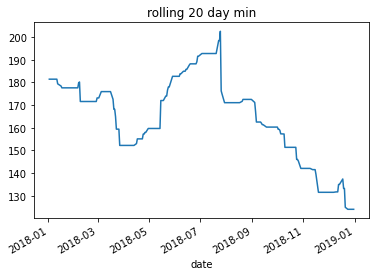

In [11]:
# rolling 20 day, show the minimum of each day
fb.close.rolling('20D').min().plot(title='rolling 20 day min')

In [13]:
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv')

<AxesSubplot:ylabel='Density'>

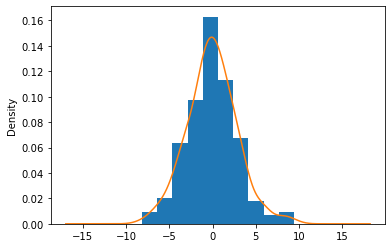

In [22]:
# difference between open and close
fb['opentoclose'] = fb.open - fb.close
# create the histogram. density=true is required for the kde to show up properly
hist = fb['opentoclose'].plot(kind='hist', density=True)
fb['opentoclose'].plot(kind='kde', ax=hist)

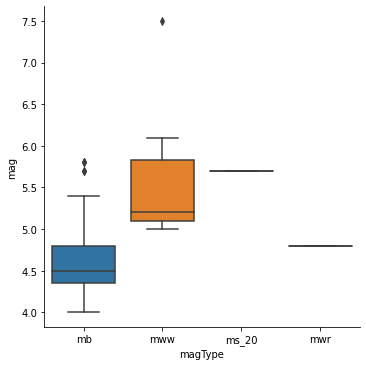

In [31]:
# make a variable to use in data argument later
indonesia_quakes = quakes.query('parsed_place == "Indonesia"')
# seaborn to create a box plot where mag is y and each magType is on the x axis
sns.catplot(x='magType', y='mag', data=indonesia_quakes, kind='box')

<AxesSubplot:title={'center':'Weekly Max High Price - Min Low Price'}, xlabel='date'>

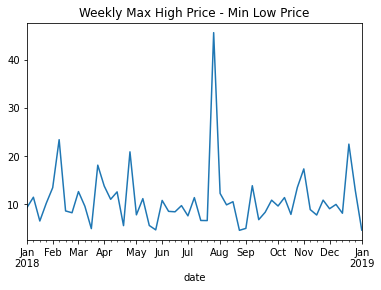

In [38]:
# resample data so that it is weekly instead of daily
fb_resample = fb.resample('1W').agg({'high': 'max', 'low': 'min'})
# find the difference between high and low
weekly_diff = fb_resample['high'] - fb_resample['low']
# plot it on a line
weekly_diff.plot(kind='line', title='Weekly Max High Price - Min Low Price')

In [59]:
# Read the data and set the date column as the index
covid = pd.read_csv('data/covid19_cases.csv')
# create date column and make that the index
covid['date'] = pd.to_datetime(covid['dateRep'])
covid.set_index('date', inplace=True)
# Makes it easier down the line
covid.replace({'countriesAndTerritories': {'United_States_of_America': 'USA'}}, inplace=True)

<AxesSubplot:title={'center':'Brazil, India & USA'}, xlabel='date'>

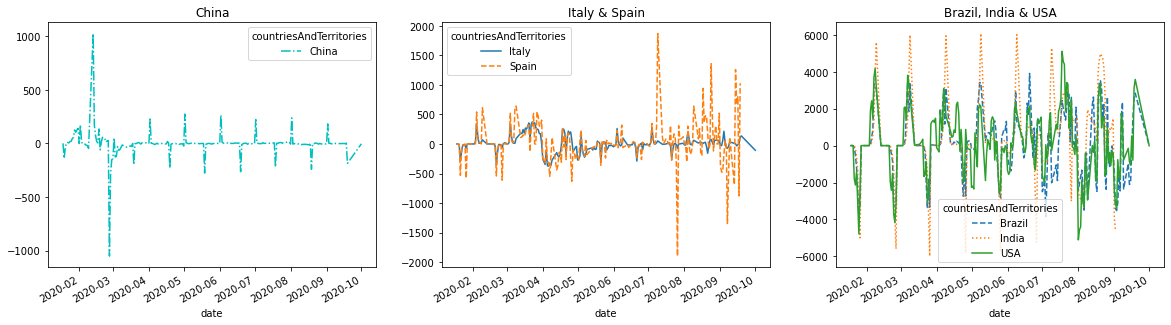

In [73]:
# select dates to plot
covid = covid.loc['2020-01-01':'2020-10-01']

rolling_14day = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases').apply(
    lambda x: x.diff().rolling(14).mean()
)

# create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# put data on each plot (axes)
rolling_14day[['China']].plot(
    ax=axes[0], title='China', style='-.c')
rolling_14day[['Italy', 'Spain']].plot(
    ax=axes[1], title='Italy & Spain', style=['-', '--'])
rolling_14day[['Brazil', 'India', 'USA']].plot(
    ax=axes[2], title='Brazil, India & USA', style=['--', ':', '-'])


In [74]:
fb.head()

,open,high,low,close,volume,opentoclose
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,-3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,-2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,0.57
2018-01-05,185.59,186.90,184.9300,186.85,13574535,-1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,-1.08


In [136]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', parse_dates=['date'], index_col='date')

# a) create the daily difference between open and previous close
daily_diff = fb['open'] - fb['close'].shift(1)

# b) monthly resample of daily_diff
monthly_resample = daily_diff.resample('1M').sum()

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

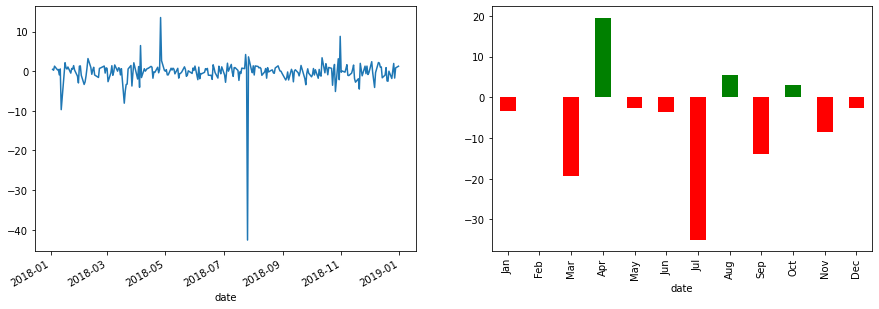

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

daily_diff.plot(ax=axes[0])
# monthly_resample.index = monthly_resample.index.strftime('%b')
monthly_resample.plot(ax=axes[1], 
                      kind='bar', 
                      color=np.where(monthly_resample <= 0, 'r', 'g'))
# technically also works. i like how this code looks better, but i dont remember how to not have it output
# the text list portion. keeping it here for reference though
axes[1].set_xticklabels(monthly_resample.index.strftime('%b'))